## Basic usage

In [1]:
import gnt
import pandas as pd

### Data
First, we load data from Najm et al. "Orthologous CRISPR–Cas9 enzymes for combinatorial genetic screens." These data should be in the format: guide 1, guide 2, gene 1, gene 2, followed by different conditions that were screened.

In [2]:
lfcs = pd.read_csv('https://raw.githubusercontent.com/PeterDeWeirdt/bigpapi/master/data/processed/bigpapi_lfcs.csv')
lfcs

,U6 Sequence,H1 Sequence,U6 gene,H1 gene,Day 21_786O,Day 21_A375,Day 21_A549,Day 21_HT29,Day 21_Meljuso,Day 21_OVCAR8
0,AAAGTGGAACTCAGGACATG,AAAAAAAGAGTCGAATGTTTT,HPRT intron,6T,0.421135,0.250043,0.725424,0.635972,0.127104,0.245427
1,AAAGTGGAACTCAGGACATG,AAAGAGTCCACTCTGCACTTG,HPRT intron,UBC,0.040784,0.125369,0.343278,0.524569,-0.175984,0.371689
2,AAAGTGGAACTCAGGACATG,AACAGCTCCGTGTACTGAGGC,HPRT intron,CD81,0.711486,0.857567,1.513217,0.970841,0.630948,0.675330
3,AAAGTGGAACTCAGGACATG,AAGACGAAATTGAAGACGAAG,HPRT intron,CD81,0.451992,0.588394,1.283543,0.771713,0.409791,0.643640
4,AAAGTGGAACTCAGGACATG,AAGCGTACTGCTCATCATCGT,HPRT intron,HSP90AA1,0.477678,-0.652709,0.442170,0.021827,0.187209,-0.120412
...,...,...,...,...,...,...,...,...,...,...
9179,TTCTGACTACAACATCCAGA,TTGCTTTCATTTAATGCTACA,UBB,PARP2,-0.228266,-0.371034,-0.014272,0.570256,-0.437522,-0.717872
9180,TTCTGACTACAACATCCAGA,TTGGGACGAGTCCTGTGAGAA,UBB,IMPDH1,-0.178963,-0.024237,-0.323317,0.630812,-0.421810,0.197531
9181,TTCTGACTACAACATCCAGA,TTTAGGAATTGCTGTTGGGAC,UBB,HPRT intron,-0.266031,-0.429865,-0.145153,0.147415,-0.454209,-0.266580
9182,TTCTGACTACAACATCCAGA,TTTCCATCACTTGGTTGAATA,UBB,BCL2A1,-0.295739,-0.221819,-0.173578,0.231540,-0.430689,-0.377972


### Calculating residuals
From the log fold changes, we calculate **residuals** at the guide level. We reason that interactors for a given “anchor” guide deviates from the expected range of LFCs of its “target” pairs. We fit a linear model between the median LFC of targets paired with controls and the average LFC of constructs with both an anchor and target guide. Negative residuals from this line indicate a synthetic lethal relationship, whereas positive residuals represent a buffering interaction. 

In [3]:
guide_residuals, model_info = gnt.get_guide_residuals(lfcs, ['CD81', 'HPRT intron'])
guide_residuals.sort_values('residual_z')

,anchor_guide,target_guide,anchor_gene,target_gene,condition,lfc,lfc_target,residual,residual_z
3822,AAGCACCAGATCATGCACCG,TCGTGGGCACAAGGTCCTACA,MAP2K2,MAP2K1,Day 21_HT29,-3.339721,-1.462993,-1.855250,-7.024817
76126,GGGTAGTTCTCTCTTCATGGA,TCATCAACAGAGCCCGCCAA,WEE1,WEE1,Day 21_HT29,-5.676895,-1.874498,-2.627443,-6.821507
70479,GGCGATCTGGGGGAGGGGTGC,GCTGTCAGGAGTATTCTGAC,CD81,CHEK1,Day 21_HT29,-5.731891,-4.358044,-1.587411,-6.419596
2106,AACAGCTCCGTGTACTGAGGC,TGGTATTGGAATAACTCACA,CD81,CHEK1,Day 21_HT29,-5.921955,-4.476059,-1.468627,-6.151146
49800,GAAAGTATCTCGTTACTGGAA,TGGTATTGGAATAACTCACA,BRCA1,CHEK1,Day 21_HT29,-5.573397,-4.476059,-1.366310,-6.052855
...,...,...,...,...,...,...,...,...,...
68740,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_HT29,2.950638,0.978768,1.750542,6.790943
57533,GATCACGCCTCCAGCCAGCTG,GGATCACGCCTCCAGCCAGC,CD81,CD81,Day 21_786O,3.943046,0.835260,2.536494,8.249168
68452,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_786O,3.943046,1.040996,2.460461,8.347438
68932,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_OVCAR8,4.011292,1.315501,2.334258,8.510013


### Model info
We can also look at the fit of the linear model for each guide, by considering its R<sup>2</sup>. A low R<sup>2</sup> can represent a phenotypically dominant guide.

In [4]:
model_info.sort_values('R2')

,model,R2,f_pvalue,const,beta,anchor_guide,anchor_gene,condition
855,linear,0.148726,1.237419e-04,-4.285076,0.358985,GTTGTGCGCGTGCTCGAAGG,EEF2,Day 21_HT29
1064,linear,0.157745,6.744733e-05,-4.926558,0.501217,TGGTGTGCAAGGCGGGCATCA,EEF2,Day 21_A549
1059,linear,0.161153,5.042642e-05,-4.805119,0.403164,TGGTATTGGAATAACTCACA,CHEK1,Day 21_HT29
1062,linear,0.246355,3.133113e-07,-4.415317,0.388307,TGGTGTGCAAGGCGGGCATCA,EEF2,Day 21_786O
1017,linear,0.277469,3.529957e-08,-3.829045,0.540500,TGCCAACCTCCGACAAAGGT,EEF2,Day 21_HT29
...,...,...,...,...,...,...,...,...
406,linear,0.991998,2.324465e-100,0.294490,1.003528,CCTGCACTCGGAGAAGAACG,AKT1,Day 21_Meljuso
347,linear,0.992036,2.092961e-99,-0.003417,1.037822,CCAGGAATCCCAGTGCCTGC,CD81,Day 21_OVCAR8
403,linear,0.992262,4.794280e-101,0.101981,0.998951,CCTGCACTCGGAGAAGAACG,AKT1,Day 21_A375
430,linear,0.992594,6.112498e-102,-0.017872,1.011639,CGCCAACAACGCCAAGGCTG,CD81,Day 21_Meljuso


### Combining scores at the gene level
We then combine the residual for a gene pair by taking the z-score

$(\bar x - \mu)/(\sigma / \sqrt{n})$

Where $\bar x$, $\mu$, $\sigma$ are the sample mean, population mean, and population standard deviation of residuals, and $n$ is the number of guide pairs.

In [5]:
gene_scores = gnt.get_gene_residuals(guide_residuals, 'residual_z')
gene_scores.sort_values('pair_z_score')

,condition,gene_a,gene_b,lfc,base_lfc_a,base_lfc_b,guide_pairs,pair_z_score_gene_a_anchor,pair_z_score_gene_b_anchor,pair_z_score
1556,Day 21_HT29,MAPK1,MAPK3,-1.754885,-0.272907,0.279881,18,-12.525889,-12.505035,-17.699536
2426,Day 21_OVCAR8,MAPK1,MAPK3,-0.616311,0.171391,0.511401,18,-12.116484,-11.518992,-16.712805
1991,Day 21_Meljuso,MAPK1,MAPK3,-1.194016,-0.318689,0.575274,18,-9.259513,-12.882693,-15.656904
1121,Day 21_A549,MAPK1,MAPK3,-1.291028,0.565824,0.293042,18,-10.960474,-9.671142,-14.588755
1999,Day 21_Meljuso,BCL2L1,MCL1,-2.643591,-1.173048,-0.004209,18,-8.671315,-11.529244,-14.283952
...,...,...,...,...,...,...,...,...,...,...
462,Day 21_A375,BCL2L1,BCL2L1,-0.544783,0.092347,0.092347,9,10.978989,10.978989,15.526634
2015,Day 21_Meljuso,MCL1,MCL1,-0.561327,-0.004209,-0.004209,9,11.730678,11.730678,16.589684
1494,Day 21_HT29,MAP2K1,MAP2K1,-1.443300,-0.864259,-0.864259,8,12.365253,12.365253,17.487108
1767,Day 21_Meljuso,BCL2L1,BCL2L1,-2.519740,-1.173048,-1.173048,9,12.901715,12.901715,18.245780


## Other models: spline, fixed slope and quadratic

There are options to implement different models for calculating residuals at the guide level, including spline, fixed slope and quadratic

In [6]:
spline_residuals, spline_model_info = gnt.get_guide_residuals(lfcs, ['CD81', 'HPRT intron'], model='spline')


In [7]:
spline_residuals.sort_values('residual_z')

,anchor_guide,target_guide,anchor_gene,target_gene,condition,lfc,lfc_target,residual,residual_z
3822,AAGCACCAGATCATGCACCG,TCGTGGGCACAAGGTCCTACA,MAP2K2,MAP2K1,Day 21_HT29,-3.339721,-1.462993,-1.863573,-7.072779
76126,GGGTAGTTCTCTCTTCATGGA,TCATCAACAGAGCCCGCCAA,WEE1,WEE1,Day 21_HT29,-5.676895,-1.874498,-2.429127,-6.594250
3726,AAGCACCAGATCATGCACCG,TCGTGGGCACAAGGTCCTACA,MAP2K2,MAP2K1,Day 21_A549,-2.394606,-0.333970,-2.073076,-5.994032
70479,GGCGATCTGGGGGAGGGGTGC,GCTGTCAGGAGTATTCTGAC,CD81,CHEK1,Day 21_HT29,-5.731891,-4.358044,-1.456496,-5.989739
6639,ACACCACCTGAAGTGACTCG,CACAGGTCTTTCCTTATGGGA,CHEK1,CHEK1,Day 21_HT29,-3.539920,-0.914817,-1.715034,-5.936140
...,...,...,...,...,...,...,...,...,...
68740,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_HT29,2.950638,0.978768,1.714901,6.907205
68932,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_OVCAR8,4.011292,1.315501,2.082427,7.943309
57533,GATCACGCCTCCAGCCAGCTG,GGATCACGCCTCCAGCCAGC,CD81,CD81,Day 21_786O,3.943046,0.835260,2.403812,8.161444
68452,GGATCACGCCTCCAGCCAGC,GATCACGCCTCCAGCCAGCTG,CD81,CD81,Day 21_786O,3.943046,1.040996,2.412874,8.223310


In [8]:
spline_gene_scores = gnt.get_gene_residuals(spline_residuals, 'residual_z')
spline_gene_scores.sort_values('pair_z_score')

,condition,gene_a,gene_b,lfc,base_lfc_a,base_lfc_b,guide_pairs,pair_z_score_gene_a_anchor,pair_z_score_gene_b_anchor,pair_z_score
1556,Day 21_HT29,MAPK1,MAPK3,-1.754885,-0.272907,0.279881,18,-12.806409,-11.354713,-17.084493
2426,Day 21_OVCAR8,MAPK1,MAPK3,-0.616311,0.171391,0.511401,18,-12.012608,-11.788136,-16.829668
1991,Day 21_Meljuso,MAPK1,MAPK3,-1.194016,-0.318689,0.575274,18,-9.445925,-12.361523,-15.420194
1121,Day 21_A549,MAPK1,MAPK3,-1.291028,0.565824,0.293042,18,-10.916840,-9.657316,-14.548126
1739,Day 21_HT29,WEE1,WEE1,-2.240272,-0.363547,-0.363547,8,-9.741398,-9.741398,-13.776417
...,...,...,...,...,...,...,...,...,...,...
2450,Day 21_OVCAR8,MCL1,MCL1,0.318145,0.345607,0.345607,9,11.242772,11.242772,15.899681
462,Day 21_A375,BCL2L1,BCL2L1,-0.544783,0.092347,0.092347,9,12.121925,12.121925,17.142990
2015,Day 21_Meljuso,MCL1,MCL1,-0.561327,-0.004209,-0.004209,9,12.724680,12.724680,17.995415
275,Day 21_786O,MCL1,MCL1,0.054351,0.031233,0.031233,9,13.243036,13.243036,18.728482


In [9]:
merged_predictions = spline_gene_scores.merge(gene_scores, how = 'inner', on = ['condition' ,'gene_a', 'gene_b'], suffixes=['_spline', '_linear'])

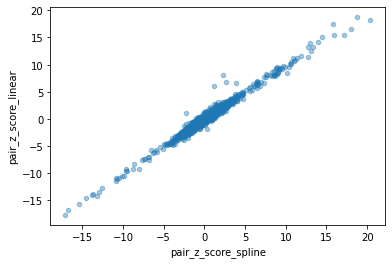

In [10]:
merged_predictions.plot.scatter('pair_z_score_spline', 'pair_z_score_linear', alpha=0.4)

The spline fit does not give as much weight to essential gene EEF2, suggesting it can avoid this source of bias

In [12]:
merged_predictions['difference'] = merged_predictions['pair_z_score_linear'] - merged_predictions['pair_z_score_spline']
merged_predictions.sort_values('difference').tail(5)

,condition,gene_a,gene_b,lfc_spline,base_lfc_a_spline,base_lfc_b_spline,guide_pairs_spline,pair_z_score_gene_a_anchor_spline,pair_z_score_gene_b_anchor_spline,pair_z_score_spline,lfc_linear,base_lfc_a_linear,base_lfc_b_linear,guide_pairs_linear,pair_z_score_gene_a_anchor_linear,pair_z_score_gene_b_anchor_linear,pair_z_score_linear,difference
989,Day 21_A549,EEF2,EEF2,-4.524111,-2.250681,-2.250681,9,2.729341,2.729341,3.859871,-4.524111,-2.250681,-2.250681,9,4.711166,4.711166,6.662595,2.802724
554,Day 21_A375,EEF2,EEF2,-4.689237,-1.987910,-1.987910,9,-1.620841,-1.620841,-2.292216,-4.689237,-1.987910,-1.987910,9,0.819324,0.819324,1.158700,3.450915
2294,Day 21_OVCAR8,EEF2,EEF2,-4.712816,-2.330618,-2.330618,9,1.902640,1.902640,2.690739,-4.712816,-2.330618,-2.330618,9,4.855800,4.855800,6.867139,4.176399
1859,Day 21_Meljuso,EEF2,EEF2,-4.994169,-2.360364,-2.360364,9,0.870522,0.870522,1.231104,-4.994169,-2.360364,-2.360364,9,4.250344,4.250344,6.010894,4.779790
27,Day 21_786O,BCL2L1,BCL2L1,-4.341688,-2.433808,-2.433808,9,1.640050,1.640050,2.319381,-4.341688,-2.433808,-2.433808,9,5.684257,5.684257,8.038754,5.719373
